In [1272]:
% cd "C:\Users\Gerome\Desktop\DMC 2018"

C:\Users\Gerome\Desktop\DMC 2018


In [1273]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [1274]:
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [1275]:
import pandas as pd

In [1276]:
dataset = pd.read_csv('Test_Frame.csv')
dataset = dataset[:123]

In [1277]:
del dataset['selling date']
del dataset['price']
del dataset['week_num']

In [1278]:
dataset.head()

,quantity,weekday,is_weekend,Google_Trend
0,26.0,Sunday,1,59
1,20.0,Monday,0,47
2,71.0,Tuesday,0,58
3,37.0,Wednesday,0,43
4,22.0,Thursday,0,41


In [1279]:
#train_data = dataset[:92]
#test_data = dataset[92:123]

In [1280]:
dataset.tail()

,quantity,weekday,is_weekend,Google_Trend
118,19.0,Saturday,1,58
119,27.0,Sunday,1,58
120,30.0,Monday,0,53
121,47.0,Tuesday,0,52
122,82.0,Wednesday,0,48


In [1281]:
from sklearn import preprocessing

In [1282]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset[['quantity','Google_Trend']] = scaler.fit_transform(dataset[['quantity','Google_Trend']])

In [1283]:
encoder = preprocessing.LabelEncoder()

In [1284]:
dataset['weekday'] = encoder.fit_transform(dataset['weekday'])

In [1285]:
dataset['is_weekend'] = encoder.fit_transform(dataset['is_weekend'])

In [1286]:
dataset.tail()

,quantity,weekday,is_weekend,Google_Trend
118,0.133858,2,1,0.373134
119,0.196850,3,1,0.373134
120,0.220472,1,0,0.298507
121,0.354331,5,0,0.283582
122,0.629921,6,0,0.223881


In [1287]:
hotencoder = preprocessing.OneHotEncoder()

In [1288]:
import numpy as np

In [1289]:
weekday = np.array(dataset['weekday']).reshape(-1,1)

In [1290]:
weekend = np.array(dataset['is_weekend']).reshape(-1,1)

In [1291]:
hotencoder.fit(weekday)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [1292]:
onehot_weekday = hotencoder.transform(weekday).toarray()

In [1293]:
hotencoder.fit(weekend)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [1294]:
onehot_weekend = hotencoder.transform(weekend).toarray()

In [1295]:
weekday_df = pd.DataFrame(onehot_weekday)

In [1296]:
weekend_df = pd.DataFrame(onehot_weekend)

In [1297]:
weekday_df.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1298]:
weekend_df.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [1299]:
weekday_df.columns = ['is_friday(0)' , 'is_monday(1)', 'is_saturday(2)', 'is_sunday(3)', 'is_thursday(4)', 'is_tuesday(5)', 'is_wednesday(6)']

In [1300]:
weekend_df.columns = ['is_weekend_no(0)', 'is_weekend_yes(1)']

In [1301]:
merge1 = pd.merge(dataset, weekday_df, how='left', left_index=True, right_index=True)

In [1302]:
dataset = pd.merge(merge1, weekend_df, how='left', left_index=True, right_index=True)

In [1303]:
dataset.head()

,quantity,weekday,is_weekend,Google_Trend,is_friday(0),is_monday(1),is_saturday(2),is_sunday(3),is_thursday(4),is_tuesday(5),is_wednesday(6),is_weekend_no(0),is_weekend_yes(1)
0,0.188976,3,1,0.388060,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.141732,1,0,0.208955,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.543307,5,0,0.373134,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.275591,6,0,0.149254,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.157480,4,0,0.119403,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [1304]:
del dataset['weekday']
del dataset['is_weekend']

In [1305]:
empty_list = []

for i in dataset.columns:
    empty_list.append(i)

In [1306]:
for column in empty_list:
    for obs in range(1,8):
        dataset[column + "_T_" + str(obs)] = dataset[column].shift(obs)

In [1307]:
#dataset.fillna(0.00, inplace=True)

In [1308]:
#dataset.to_csv('cleaned_test_frame_copy.csv', index = False)

In [1309]:
date_set = pd.read_csv('Test_Frame.csv')
date_set = date_set[:123]
date_set = date_set['selling date']

In [1310]:
dataset = pd.merge(dataset, date_set.to_frame(), left_index=True, right_index=True)

In [1311]:
dataset['selling date'] = pd.to_datetime(dataset['selling date'])

In [1312]:
dataset.set_index('selling date', inplace = True)

In [1313]:
dataset.dropna(inplace=True)

In [1314]:
dataset.head(85)

,quantity,Google_Trend,is_friday(0),is_monday(1),is_saturday(2),is_sunday(3),is_thursday(4),is_tuesday(5),is_wednesday(6),is_weekend_no(0),...,is_weekend_no(0)_T_5,is_weekend_no(0)_T_6,is_weekend_no(0)_T_7,is_weekend_yes(1)_T_1,is_weekend_yes(1)_T_2,is_weekend_yes(1)_T_3,is_weekend_yes(1)_T_4,is_weekend_yes(1)_T_5,is_weekend_yes(1)_T_6,is_weekend_yes(1)_T_7
selling date,,,,,,,,,,,,,,,,,,,,,
2017-10-08,0.204724,0.328358,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-10-09,0.141732,0.119403,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-10-10,0.141732,0.089552,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2017-10-11,0.236220,0.164179,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2017-10-12,0.110236,0.268657,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2017-10-13,0.110236,0.149254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2017-10-14,0.070866,0.208955,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2017-10-15,0.110236,0.223881,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-10-16,0.118110,0.089552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1315]:
values = dataset.values
values = values.astype('float32')

In [1316]:
#n_train_days = int(len(values) * 0.7)
train = values[:85, :]
test = values[85:, :]

In [1317]:
# split into input and outputs
train_X, train_y = train[:, 1:], train[:, 0]
test_X, test_y = test[:, 1:], test[:, 0]

In [1318]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(85, 1, 87) (85,) (31, 1, 87) (31,)


In [1319]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

multi_model = Sequential()
multi_model.add(LSTM(500, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=100, batch_size=30, validation_data=(test_X, test_y), verbose=0, shuffle=False)

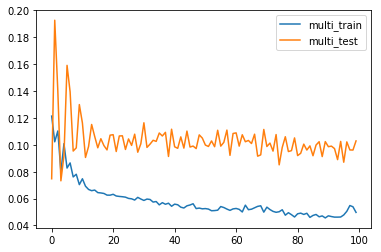

In [1320]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

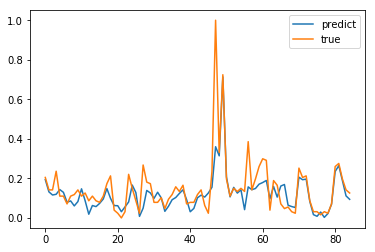

In [1321]:
yhat = multi_model.predict(train_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(train_y, label='true')
pyplot.legend()
pyplot.show()

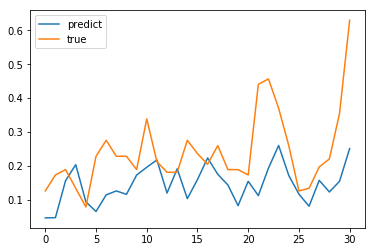

In [1322]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

In [1323]:
predictDates = dataset.tail(len(test_X)).index

In [1324]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [1325]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, :1]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [1326]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, :1]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [1327]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 17.371


In [1329]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Quantity')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Quantity')
py.iplot([multi_predict_chart, actual_chart])